# Tutorial 3 - MD Examples for MDVContainment
To get acquanted with the functionalities of MDVContainment we start with 3D systems due to their clean visualization. Visualization of 3D systems makes use of VMD in this tutorial. However, feel free to visualize the generated GRO files with your favorite software.

1) Single island in ocean
2) Nested islands in ocean
3) Translation invariance (up to voxel resolution)
4) Multiple outsides
5) Closing (small) holes
6) Diagonal neighbours are included

In [1]:
import mdvcontainment as mdvc
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import webbrowser
import networkx as nx
import matplotlib.image as mpimg

## Visualization Wrappers

In [2]:
def visualize_3D(name, command_string='-e visualization.vmd'):
    """
    Visualizes the GRO file using the included render settings.

    Feel free to change this function to whatever visualizer you prefer.
    """
    # Plot using VMD
    !vmd $name $command_string
    return

In [3]:
def draw_containment_nx(G, images, write=True, fname='containment.png', imsize=0.2, lwidth=1, nodesize=0, dpi=300, prog='neato'):
    """
    Draws the containment graph using networkx and the provided images.

    """
    node_size = np.max(mpimg.imread(images[list(images.keys())[0]]).shape)*nodesize

    # The amount of images
    N = len(images)

    # Setting up the layout of the graph coordinates
    #pos=nx.spring_layout(G,k=k)
    pos = nx.nx_agraph.graphviz_layout(G, prog=prog)

    # draw with images on nodes
    nx.draw_networkx(G,pos,width=lwidth,edge_color="grey",alpha=1, node_size=node_size, node_color='white', arrows=False)
    ax=plt.gca()
    ax.axis('off')
    fig=plt.gcf()
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    for n in G.nodes():
        (x,y) = pos[n]
        xx,yy = trans((x,y)) # figure coordinates
        xa,ya = trans2((xx,yy)) # axes coordinates
        a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
        a.imshow(mpimg.imread(images[n]))
        a.set_aspect('equal')
        a.axis('off')
    if write:
        plt.savefig(fname, dpi=dpi, bbox_inches="tight")
    plt.show()
    return

## 1 - Bicelle Containment

In [4]:
# Load the GRO
base_name = 'bicelle'
u = mda.Universe('gros/bicelle.gro')
selection_string = 'name C2A C2B D2A D2B C3A C3B D3A D3B C4A C4B D4A D4B C5A C5B D5A D5B'
selection = u.select_atoms(selection_string)

/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [5]:
# Generate the containment hierarchy
containers = mdvc.Containers(selection.atoms, resolution=0.5, blur_amount=1)

Creating voxel masks with a resolution of 0.5...
Blurring voxel masks with 1...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1, 2): 0, (-2,): 0, (-1,): 3}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


In [6]:
# Write the components pdb (the components are in the beta field, the containment in the containment.vmd)
containers.write_components(fname_struc=f'{base_name}_containment.pdb', fname_vmd=f'{base_name}_containment.vmd')

/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/bart/.virtualenvs/containment/lib/python3.8/site-

In [7]:
## Show the objects (use as selection all, with visualization of VDW and coloring set to beta to see the components)
#visualize_3D(f'{base_name}_containment.pdb', command_string='-e components.vmd')

In [8]:
## Draw the raw containment graph using networkx
#nx.draw_networkx(containers.containment_graph, )

In [9]:
# Rendering should have an optional make whole option!
# Render using VMD 
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')

/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(




Container -2
------------------------
{'ION': 579, 'OA-1': 888, 'OAOH': 451, 'W': 59458}
I wrote bicelle_-2.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 29GB (92%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA

/home/bart/.virtualenvs/containment/lib/python3.8/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: Warning: 1.0 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


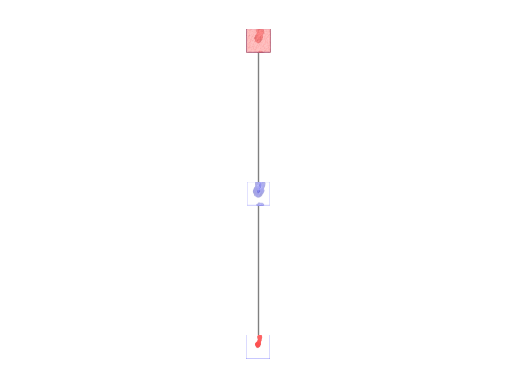

In [10]:
# Plot using nx matplotlib and the VMD images
containment_plot = draw_containment_nx(containers.containment_graph, containers._images, imsize=0.05, write=True, fname=f'{base_name}_containment.png', dpi=600, prog='dot')

In [11]:
def get_component_composition(atomgroup, molar=False):
    """
    Returns the composition of an atomgroup as a dict {resname : count}.
    """
    if molar:
        composition = dict(zip(
            *np.unique(atomgroup.residues.resnames, return_counts=True)))
    else:
        composition = dict(zip(
            *np.unique(atomgroup.resnames, return_counts=True)))
    return composition

In [12]:
def plot_composition(composition, labels=None, fontsize=20, radius=1, label_distance=1.3, write=False, fname='composition.png', dpi=600):
    """
    Plots a piechart of the composition dictionary {resname : count}.
    """
    # I dont know how to do this without this stupid function...
    def autopct_more_than_100(pct):
        return ('%1.f%%' % pct) if pct > 100 else ''
    
    # Creates the labels and sizes, allowing for more labels than sizes
    #  this can be used so the coloring in all the graphs is the same.
    if labels is None:
        labels = list(composition.keys())
    sizes = []
    for label in labels:
        try:
            sizes.append(composition[label])
        except KeyError:
            sizes.append(0)
    sizes = np.array(sizes, dtype=float)
    
    fig1, ax = plt.subplots()
    p, t, a = ax.pie(sizes, labels=None, textprops={'fontsize': fontsize}, radius = radius, labeldistance=label_distance, autopct=autopct_more_than_100)

    # normalize dataframe (not actually needed here, but for general case)
    normsizes = sizes/sizes.sum()*100
    # create handles and labels for legend, take only those where value is > 1
    h,l = zip(*[(h,lab) for h,lab, size in zip(p, labels, sizes) if size > 0])
    
    ax.legend(h, l,loc="best", bbox_to_anchor=(1,1), fontsize=fontsize)
    
    if write:
        plt.savefig(fname, dpi=dpi, bbox_inches="tight")
    plt.show()

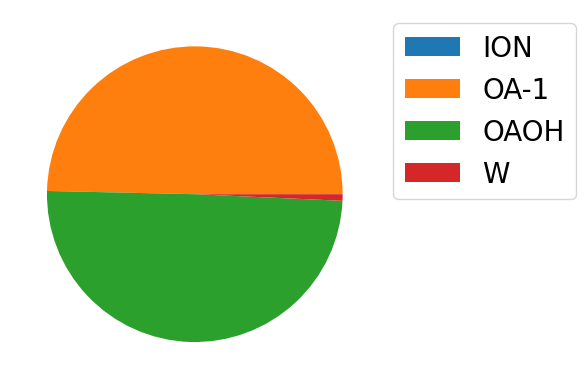

In [13]:
# Plotting the composition
component = 1
composition = get_component_composition(containers.get_atomgroup_from_nodes([component]))
plot_composition(composition, write=True, fname=f'{base_name}_{component}_composition.png', labels=np.unique(u.residues.resnames))

In [14]:
def plot_component_composition(component, render_img, composition_img, write=False, fname='component_composition.png', dpi=600):
    """
    Plots the component composition dual plot.
    """
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.imshow(mpimg.imread(render_img))
    plt.axis('off')

    plt.subplot(1, 2, 2) # index 2
    plt.imshow(mpimg.imread(composition_img))
    plt.axis('off')
    plt.tight_layout()

    if write:
        plt.savefig(fname, dpi=dpi, bbox_inches="tight")

    plt.show()

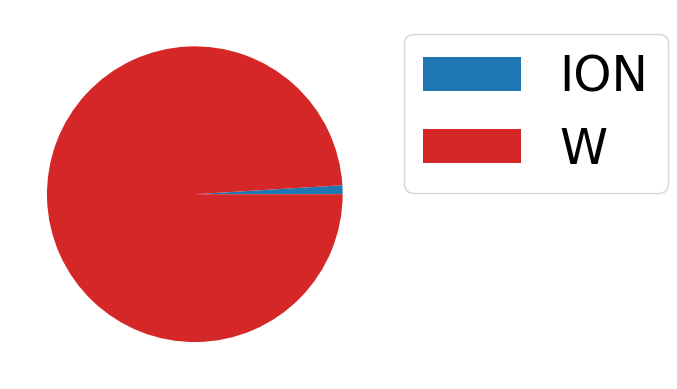

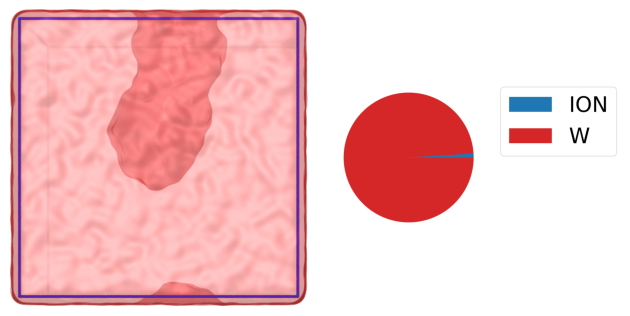

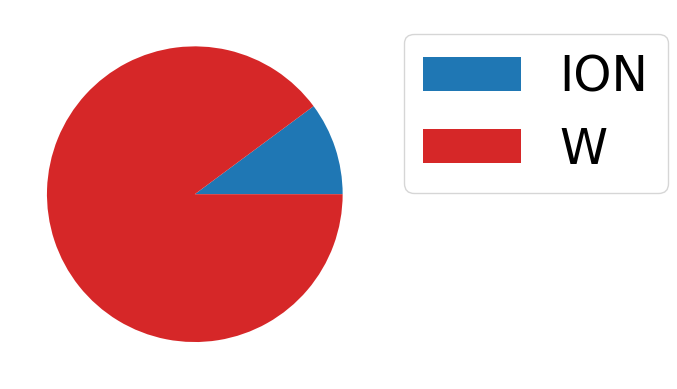

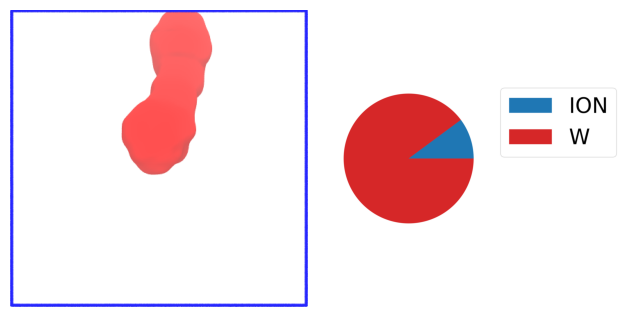

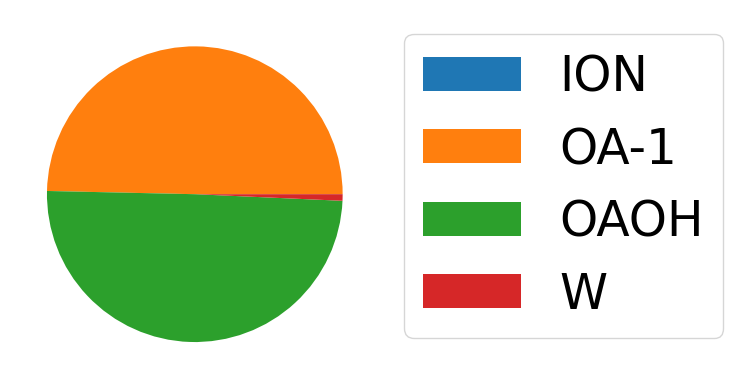

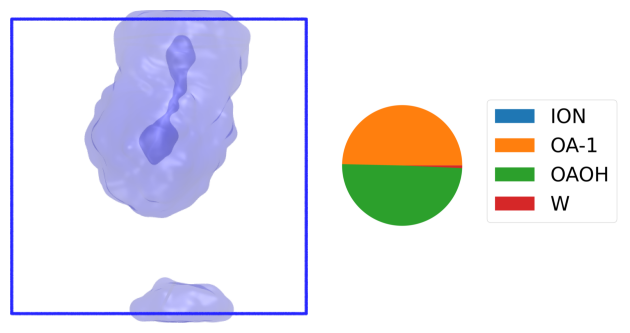

In [15]:
for component in containers.get_components():
    # Specifying which residues should be seen as part of the selection. This is best done by hand? No this can 
    #  be obtained from the residues of the selection made at the start.
    if component > 0:
        composition = get_component_composition(containers.get_atomgroup_from_nodes([component]))#.select_atoms(f'same resid as {selection_string}'))
    else:
        composition = get_component_composition(containers.get_atomgroup_from_nodes([component]).select_atoms(f'not same resid as {selection_string}'))
    plot_composition(composition, labels=np.unique(u.residues.resnames), write=True, fname=f'{base_name}_{component}_composition.png', fontsize=35)
    plot_component_composition(component, containers._images[component], f'{base_name}_{component}_composition.png', write=True, fname=f'{base_name}_component_composition_{component}.png')

In [16]:
# This would be a really nice function and it would make this part a lot more neat.
#containers.get_container(id) -> atomgroup with all atoms in the container and downstream of it
#composition = dict(zip(
#    *np.unique(
#        containers.get_atomgroup_from_nodes(
#            containers.get_downstream_nodes(
#                [1]), b_factor=True, ).residues.resnames, return_counts=True)))

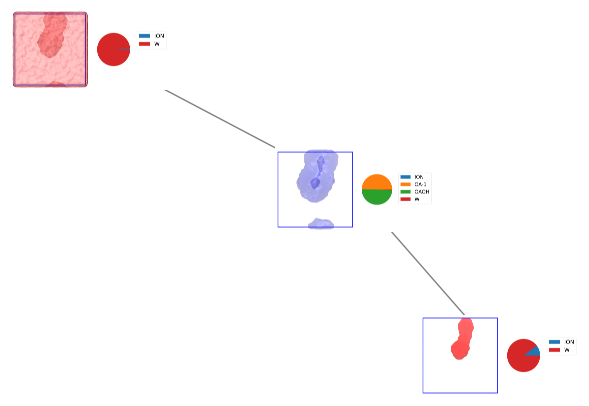

In [17]:
# Plot using nx matplotlib and the VMD images
containers.load_renders(f'{base_name}_component_composition_', ftype='png')
containment_plot = draw_containment_nx(
    containers.containment_graph, 
    containers._images, 
    imsize = 0.25, 
    write= True, 
    fname= f'{base_name}_containment.png', 
    dpi = 1600, 
    prog = 'neato'
)

In [18]:
# I want to add a special indication for the outside(s)

In [24]:
dict(zip(*np.unique(u.atoms.resnames, return_counts=True)))

{'ION': 600, 'OA-1': 3000, 'OAOH': 3000, 'W': 59678}

In [25]:
dict(zip(*np.unique(u.atoms.residues.resnames, return_counts=True)))

{'ION': 600, 'OA-1': 600, 'OAOH': 600, 'W': 59678}

AttributeError: 'Universe' object has no attribute 'resnames'